In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow import keras
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
#load the data 
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 77s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0].shape

(32, 32, 3)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
def plot_show(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

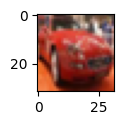

In [12]:
plot_show(5)

In [13]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

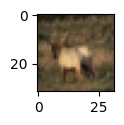

In [16]:
plot_show(3)

In [18]:
classes[y_train[3][0]]

'deer'

In [19]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [20]:
x_train_scaled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [22]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [23]:
#one hot encoding 
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)

In [24]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_test_categorical = keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)

In [34]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation ='relu'),
#     keras.layers.Dense(2000,activation ='relu'),
    keras.layers.Dense(1000,activation ='relu'),

    keras.layers.Dense(10,activation="sigmoid")    
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics = ['accuracy'])
# model.fit(x_train_scaled,y_train_categorical,epochs=50)

In [35]:
model.fit(x_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 67s 42ms/step - loss: 1.8164 - accuracy: 0.3524
Epoch 2/50
1563/1563 [==============================] - 66s 42ms/step - loss: 1.6275 - accuracy: 0.4255
Epoch 3/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.5437 - accuracy: 0.4545
Epoch 4/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4849 - accuracy: 0.4754
Epoch 5/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4356 - accuracy: 0.4955
Epoch 6/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3889 - accuracy: 0.5101
Epoch 7/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3514 - accuracy: 0.5255
Epoch 8/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3182 - accuracy: 0.5375
Epoch 9/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2844 - accuracy: 0.5478
Epoch 10/50
1563/1563 [==============================] - 62s 40m

In [43]:
classes[np.argmax(model.predict(x_test_scaled)[1])]

313/313 [==============================] - 4s 12ms/step


'ship'

In [1]:
classes[y_test[5][0]]

NameError: name 'classes' is not defined